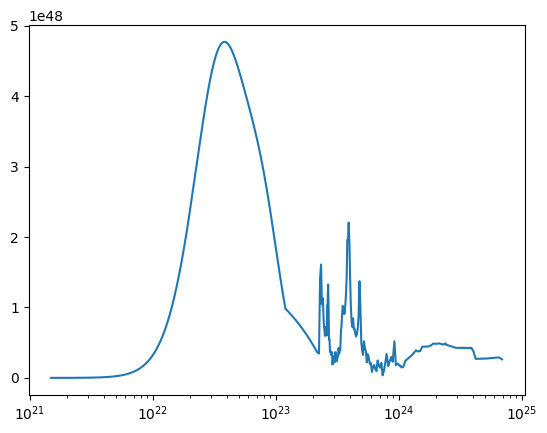

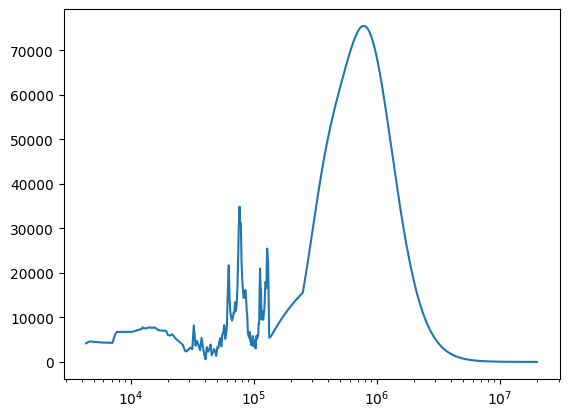

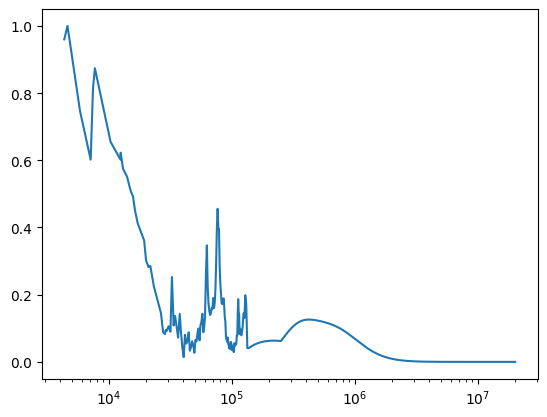

In [9]:
###fnu to flam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
path = 'templates/Kirkpatrick/z2_SF_SED.txt'
#path = 'templates/Kirkpatrick/z1_SF_SED.txt'
#path = 'templates/Kirkpatrick/silicate_AGN_SED.txt'
#path = 'templates/Kirkpatrick/featureless_AGN_SED.txt'
fnuset = []
with open(path, 'r+') as f:
    lines = f.readlines()
    for line in lines[4:]:
        fnuset.append(line[:-1].split(" "))
        for i in range(len(fnuset[-1]))[::-1]:
            if fnuset[-1][i] == '':
                fnuset[-1].pop(i)
        fnuset[-1] = list(map(float, fnuset[-1]))

fnuset = np.array(fnuset)
fnuset = fnuset.T

nu2lam = lambda nu: 3e18/nu
lam2nu = lambda lam: 3e18/lam
Lnu2Llam = lambda nu, Lnu: Lnu*3e18/nu2lam(nu)**2

lamset_wav = fnuset[0]*10000
nu_um = lam2nu(fnuset[0]/1000000)
lamset_flux = Lnu2Llam(nu_um, fnuset[1])
lamset_flux = lamset_flux/np.max(lamset_flux)
lamset = np.array([lamset_wav, lamset_flux])
lamset = lamset.T
plt.plot(nu_um, fnuset[1]*nu_um)
plt.xscale('log')
plt.show()
plt.plot(lamset[:,0], lamset[:,1]*lamset[:,0])
plt.xscale('log')
plt.show()
plt.plot(lamset[:,0], lamset[:,1])
plt.xscale('log')
plt.show()
newpath = path.replace('.txt', '_template.spec')
np.savetxt(newpath, lamset)